In [2]:
import tensorflow.keras as keras
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    MaxPool2D,
    Flatten,
    Dropout,
    BatchNormalization,
)
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Load in our data from CSV files
train_df = pd.read_csv("C:/Users/Lenovo/Downloads/ASL/Data/Training/sign_mnist_train.csv")
valid_df = pd.read_csv("C:/Users/Lenovo/Downloads/ASL/Data/Training/sign_mnist_valid.csv")

# Separate out our target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

# Turn our scalar targets into binary categories
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# Normalize our image data
x_train = x_train / 255
x_valid = x_valid / 255

# Reshape the image data for the convolutional network
x_train = x_train.reshape(-1,28,28,1)
x_valid = x_valid.reshape(-1,28,28,1)

In [13]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding="same", activation="relu", 
                 input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(50, (3, 3), strides=1, padding="same", activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Conv2D(25, (3, 3), strides=1, padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides=2, padding="same"))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(units=num_classes, activation="softmax"))

In [14]:
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

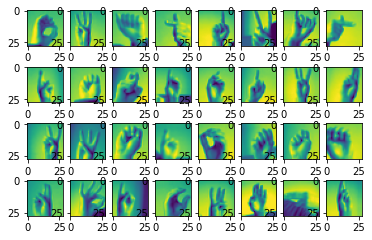

In [15]:
batch_size = 32
img_iter = datagen.flow(x_train, y_train, batch_size=batch_size)

x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(batch_size):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

In [16]:
datagen.fit(x_train)

In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model.fit(img_iter,
          epochs=9,
          steps_per_epoch=len(x_train)/batch_size, # Run same number of steps we would if we were not using a generator.
          validation_data=(x_valid, y_valid))

Epoch 1/9
857/857 [==============================] - 56s 64ms/step - loss: 0.0755 - accuracy: 0.9781 - val_loss: 0.0532 - val_accuracy: 0.9801
Epoch 2/9
857/857 [==============================] - 53s 62ms/step - loss: 0.0678 - accuracy: 0.9801 - val_loss: 0.9615 - val_accuracy: 0.8358
Epoch 3/9
857/857 [==============================] - 56s 65ms/step - loss: 0.0607 - accuracy: 0.9818 - val_loss: 0.0836 - val_accuracy: 0.9670
Epoch 4/9
857/857 [==============================] - 55s 64ms/step - loss: 0.0624 - accuracy: 0.9817 - val_loss: 0.0518 - val_accuracy: 0.9877
Epoch 5/9
857/857 [==============================] - 56s 65ms/step - loss: 0.0668 - accuracy: 0.9820 - val_loss: 0.1007 - val_accuracy: 0.9816
Epoch 6/9
857/857 [==============================] - 56s 65ms/step - loss: 0.0618 - accuracy: 0.9831 - val_loss: 0.0244 - val_accuracy: 0.9912
Epoch 7/9
857/857 [==============================] - 55s 64ms/step - loss: 0.0566 - accuracy: 0.9840 - val_loss: 0.1580 - val_accuracy: 0.9551

In [30]:
model.save('asl_model')

INFO:tensorflow:Assets written to: asl_model\assets


In [31]:
model = keras.models.load_model('asl_model')

In [32]:
def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image, cmap='gray')

In [33]:
def load_and_scale_image(image_path):
    image = image_utils.load_img(image_path, color_mode="grayscale", target_size=(28,28))
    return image
   

In [34]:
def predict_letter(file_path):
    # Show image
    show_image(file_path)
    # Load and scale image
    image = load_and_scale_image(file_path)
    # Convert to array
    image =  image_utils.img_to_array(image)
    # Reshape image
    image = image.reshape(1,28,28,1) 
    # Normalize image
    image = image / 255
    # Make prediction
    prediction = model.predict(image)
    # Convert prediction to letter
    alphabet = "abcdefghiklmnopqrstuvwxy"
    predicted_letter = alphabet[np.argmax(prediction)]
    # Return prediction
    return predicted_letter 

'l'

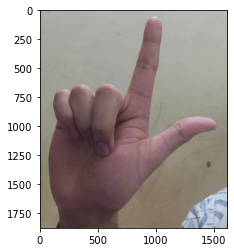

In [37]:
predict_letter("C:/Users/Lenovo/Downloads/ASL/Data/Test/L.jpg")

In [40]:
print(keras. __version__)
print(pd. __version__)
print(np. __version__)

2.8.0
1.2.4
1.20.1
